In [3]:
# Impost nessary libraries
import pandas as pd

In [4]:
# Set display options to show all rows and columns without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [59]:
# Import DOB data
df = pd.read_csv('./Data/DOB_Permit_Issuance.csv', low_memory=False)
df.shape

(3952399, 60)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952399 entries, 0 to 3952398
Data columns (total 60 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   BOROUGH                           object 
 1   Bin #                             int64  
 2   House #                           object 
 3   Street Name                       object 
 4   Job #                             int64  
 5   Job doc. #                        int64  
 6   Job Type                          object 
 7   Self_Cert                         object 
 8   Block                             object 
 9   Lot                               object 
 10  Community Board                   object 
 11  Zip Code                          float64
 12  Bldg Type                         float64
 13  Residential                       object 
 14  Special District 1                object 
 15  Special District 2                object 
 16  Work Type                         ob

In [6]:
# Check first 5 rows of data
df.head()

,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,Community Board,Zip Code,Bldg Type,Residential,Special District 1,Special District 2,Work Type,Permit Status,Filing Status,Permit Type,Permit Sequence #,Permit Subtype,Oil Gas,Site Fill,Filing Date,Issuance Date,Expiration Date,Job Start Date,Permittee's First Name,Permittee's Last Name,Permittee's Business Name,Permittee's Phone #,Permittee's License Type,Permittee's License #,Act as Superintendent,Permittee's Other Title,HIC License,Site Safety Mgr's First Name,Site Safety Mgr's Last Name,Site Safety Mgr Business Name,Superintendent First & Last Name,Superintendent Business Name,Owner's Business Type,Non-Profit,Owner's Business Name,Owner's First Name,Owner's Last Name,Owner's House #,Owner's House Street Name,Owner’s House City,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
0,MANHATTAN,1088749,1,MADISON AVE,141008987,1,A3,Y,00853,00002,105,10010.0,2.0,NaN,NaN,NaN,EQ,ISSUED,INITIAL,EQ,1,OT,NaN,NaN,05/10/2022,05/10/2022,05/10/2023,05/10/2022,FRANKIE,COLLETTA,"FORCE INSTALLATIONS, LLC",2122441050,GC,0621634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,N,SL GREEN REALTY CORP.,JOHN,KRUSH,NaN,NaN,NaN,NaN,NaN,2125942700,05/11/2022 00:00:00,3905851,40.740909,-73.987947,2.0,56.0,Hudson Yards-Chelsea-Flatiron-Union Square
1,STATEN ISLAND,5076937,87,BOYLAN STREET,540218539,1,A2,Y,05687,00066,503,10312.0,1.0,YES,SRD,NaN,OT,ISSUED,INITIAL,EW,1,OT,NaN,NOT APPLICABLE,05/10/2022,05/10/2022,10/01/2022,05/12/2022,PAUL,JOYCE,SUNRUN INSTALLATION SVC,8055407643,GC,0613329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL,N,NaN,STEVEN,MONTANA,NaN,NaN,NaN,NaN,NaN,9174201655,05/11/2022 00:00:00,3905852,40.563654,-74.179584,51.0,17008.0,Arden Heights
2,STATEN ISLAND,5001506,217,LAFAYETTE AVENUE,540218575,1,A2,Y,00064,00022,501,10301.0,1.0,YES,HS,NaN,OT,ISSUED,INITIAL,EW,1,OT,NaN,NOT APPLICABLE,05/10/2022,05/10/2022,10/01/2022,05/15/2022,PAUL,JOYCE,SUNRUN INSTALLATION SVC,8055407643,GC,0613329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL,N,NaN,SANTO,CEBALLOS,NaN,NaN,NaN,NaN,NaN,7188125847,05/11/2022 00:00:00,3905853,40.639633,-74.094169,49.0,81.0,West New Brighton-New Brighton-St. George
3,STATEN ISLAND,5067021,170,OAKDALE STREET,540218600,1,A2,Y,05260,00001,503,10308.0,1.0,YES,SRD,NaN,OT,ISSUED,INITIAL,EW,1,OT,NaN,NOT APPLICABLE,05/10/2022,05/10/2022,10/01/2022,05/15/2022,PAUL,JOYCE,SUNRUN INSTALLATION SVC,8055407643,GC,0613329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL,N,NaN,JOANNA,GIANGRANDE,NaN,NaN,NaN,NaN,NaN,3478575846,05/11/2022 00:00:00,3905854,40.544597,-74.157153,51.0,15601.0,Great Kills
4,STATEN ISLAND,5058036,273,10 STREET,540218628,1,A2,Y,04242,00045,502,10306.0,1.0,YES,NaN,NaN,OT,ISSUED,INITIAL,EW,1,OT,NaN,NOT APPLICABLE,05/10/2022,05/10/2022,11/15/2022,05/24/2022,ALEXANDER,YACKERY,VENTURE HOME SOLAR LLC,7183982259,GC,0615255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL,N,NaN,ARKADLY,FRIDMAN,NaN,NaN,NaN,NaN,NaN,7186195891,05/11/2022 00:00:00,3905855,40.566798,-74.119726,50.0,134.0,New Dorp-Midland Beach


In [61]:
# Customize the column names
df.columns = df.columns.str.lower()
df.columns = list(map(lambda x: x.replace(' ', '_'), df.columns))
df.columns

Index(['borough', 'bin_#', 'house_#', 'street_name', 'job_#', 'job_doc._#',
       'job_type', 'self_cert', 'block', 'lot', 'community_board', 'zip_code',
       'bldg_type', 'residential', 'special_district_1', 'special_district_2',
       'work_type', 'permit_status', 'filing_status', 'permit_type',
       'permit_sequence_#', 'permit_subtype', 'oil_gas', 'site_fill',
       'filing_date', 'issuance_date', 'expiration_date', 'job_start_date',
       'permittee's_first_name', 'permittee's_last_name',
       'permittee's_business_name', 'permittee's_phone_#',
       'permittee's_license_type', 'permittee's_license_#',
       'act_as_superintendent', 'permittee's_other_title', 'hic_license',
       'site_safety_mgr's_first_name', 'site_safety_mgr's_last_name',
       'site_safety_mgr_business_name', 'superintendent_first_&_last_name',
       'superintendent_business_name', 'owner's_business_type', 'non-profit',
       'owner's_business_name', 'owner's_first_name', 'owner's_last_name',
 

In [8]:
datetime_cols = ['filing_date', 'issuance_date', 'expiration_date', 'job_start_date', 'dobrundate']

str_cols = ['house_#', 'street_name', 'block', 'lot', 'job_#', 'bin_#', 'zip_code', 'community_board', 'special_district_1', 
            'special_district_2', "permittee's_first_name", "permittee's_last_name", "permittee's_business_name", 
            "permittee's_phone_#", "permittee's_license_#", "permittee's_other_title", 'hic_license', 
            "site_safety_mgr's_first_name", "site_safety_mgr's_last_name", "site_safety_mgr_business_name", 
            "superintendent_first_&_last_name", "superintendent_business_name", "owner's_business_name", 
            "owner's_first_name", "owner's_last_name", "owner's_house_#", "owner's_house_street_name", "owner’s_house_city", 
            "owner’s_house_zip_code", "owner's_phone_#", "permit_si_no", 'nta_name', 'census_tract']

cat_cols = ['borough', 'job_type', 'job_doc._#', 'self_cert', 'bldg_type', 'work_type', 'permit_status', 'filing_status', 
            'permit_type', 'permit_sequence_#', 'permit_subtype', 'oil_gas', 'site_fill', "permittee's_license_type", 
            'act_as_superintendent', "owner's_business_type", 'non-profit', "owner’s_house_state", 'council_district']

int_cols = []
float_cols = ['latitude', 'longitude']
bool_cols = ['residential']

In [9]:
col_types = {}
for column in df.columns:
    if column in str_cols:
        col_types[column] = 'string'
    elif column in cat_cols:
        col_types[column] = 'category'
    elif column in int_cols:
        col_types[column] = 'int64'
    elif column in float_cols:
        col_types[column] = 'float64'
    elif column in bool_cols:
        col_types[column] = 'bool'

In [10]:
df = df.astype(col_types)
for datetime_col in datetime_cols:
    df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952399 entries, 0 to 3952398
Data columns (total 60 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   borough                           category      
 1   bin_#                             string        
 2   house_#                           string        
 3   street_name                       string        
 4   job_#                             string        
 5   job_doc._#                        category      
 6   job_type                          category      
 7   self_cert                         category      
 8   block                             string        
 9   lot                               string        
 10  community_board                   string        
 11  zip_code                          string        
 12  bldg_type                         category      
 13  residential                       bool          
 14  special_district_1

In [11]:
debug_df = df.groupby('permit_type', group_keys=False).apply(lambda x: x.sample(frac=0.01, ignore_index=True, 
                                                                                  random_state=42))

In [12]:
df.to_pickle('./Data/Rawdata/data.pkl')
debug_df.to_pickle('./Data/Rawdata/debug_data.pkl')

In [55]:
# Read data that is stored in previous steps to continue
df = pd.read_pickle("Data/Rawdata/debug_data.pkl")

In [12]:
# Function used to format time.
def format_time(c):
    return pd.to_datetime(c).apply(lambda x: int(x.timestamp()))

In [32]:
# TODO: Need to consider how to handle empty date

In [13]:
df[datetime_cols].dropna().apply(format_time)

NameError: name 'datetime_cols' is not defined

In [ ]:
# convert the datetime column to a pandas datetime object
# df['filing_date'] = pd.to_datetime(df['filing_date'])
# df['issuance_date'] = pd.to_datetime(df['issuance_date'])
# df['expiration_date'] = pd.to_datetime(df['expiration_date'])
# df['job_start_date'] = pd.to_datetime(df['job_start_date'], errors = 'coerce')
# df['dobrundate'] = pd.to_datetime(df['dobrundate'])

In [ ]:
# convert the datetime column to an integer
# df['filing_date'] = df['filing_date'].values.astype('int64')
# df['issuance_date'] = df['issuance_date'].values.astype('int64')
# df['expiration_date'] = df['expiration_date'].values.astype('int64')
# df['job_start_date'] = df['job_start_date'].values.astype('int64')
# df['dobrundate'] = df['dobrundate'].values.astype('int64')

In [ ]:
# divide the resulting integer by the number of nanoseconds in a second
# df['filing_date'] = df['filing_date'] // 10**9
# df['issuance_date'] = df['issuance_date'] // 10**9
# df['expiration_date'] = df['expiration_date'] // 10**9
# df['job_start_date'] = df['job_start_date'] // 10**9
# df['dobrundate'] = df['dobrundate'] // 10**9

In [ ]:
# df_debug = df.sample(frac = 0.005, random_state = 434)

In [ ]:
# df_debug.shape

In [ ]:
# df.to_pickle('./Data/Rawdata/df.pkl')
# df_debug.to_pickle('./Data/Rawdata/df_debug.pkl')

# Burzin's Data Cleaning Columns

In [32]:
column_names = [
    'work_type',
    'permit_status',
    'filing_status',
    'permit_type',
    'permit_sequence_#',
    'permit_subtype',
    'oil_gas',
    'site_fill',
    'filing_date',
    'issuance_date',
    'expiration_date',
    'job_start_date',
    "permittee's_first_name",
    "permittee's_last_name",
    "permittee's_business_name"
]

In [33]:
df['work_type'].value_counts()

work_type
OT    11728
PL     7756
EQ     5761
MH     3426
SP     1350
BL      718
FP      668
FB      402
FS      241
SD      218
CC      101
FA        2
NB        0
Name: count, dtype: int64

In [34]:
#Column : Work Type

# Changing Short forms to Full Forms
mapping_work_type = {
    'BL': 'Boiler',
    'CC': 'Curb Cut',
    'EQ': 'Construction Equipment',
    'FA': 'Fire Alarm',
    'FB': 'Fuel Burning',
    'FP': 'Fire Suppression',
    'FS': 'Fuel Storage',
    'MH': 'Mechanical/HVAC',
    'NB': 'New Building',
    'OT': 'Other',
    'PL': 'Plumbing',
    'SD': 'Standpipe',
    'SP': 'Sprinkler'
}

# Use the map function to replace the values
df['work_type'] = df['work_type'].map(mapping_work_type)

# Drop Null Values
#df = df.dropna(subset=['work_type'])

print(df['work_type'].info())

<class 'pandas.core.series.Series'>
Index: 39523 entries, 0 to 779
Series name: work_type
Non-Null Count  Dtype   
--------------  -----   
32371 non-null  category
dtypes: category(1)
memory usage: 348.0 KB
None


In [35]:
# Permit Status

mapping_permit_status = {
    'ISSUED': 'Issued',
    'IN PROCESS': 'In-Process',
    'RE-ISSUED': 'Re-Issued',
    'REVOKED': 'Revoked'
}

# Use the map function to replace the values
df['permit_status'] = df['permit_status'].map(mapping_permit_status)

print(df['permit_status'].info())

<class 'pandas.core.series.Series'>
Index: 39523 entries, 0 to 779
Series name: permit_status
Non-Null Count  Dtype   
--------------  -----   
39401 non-null  category
dtypes: category(1)
memory usage: 347.6 KB
None


In [36]:
# Filing Status

mapping_filing_status = {
    'INITIAL': 'Initial',
    'RENEWAL': 'Renewal'
}

# Use the map function to replace the values
df['filing_status'] = df['filing_status'].map(mapping_filing_status)

print(df['filing_status'].info())

df['filing_status'].unique()

<class 'pandas.core.series.Series'>
Index: 39523 entries, 0 to 779
Series name: filing_status
Non-Null Count  Dtype   
--------------  -----   
39523 non-null  category
dtypes: category(1)
memory usage: 347.5 KB
None


['Initial', 'Renewal']
Categories (2, object): ['Initial', 'Renewal']

In [37]:
# Permit Type

mapping_permit_type = {
    'AL': 'Alteration',
    'DM': 'Demolition',
    'EQ': 'Construction Equipment',
    'EW': 'Equipment Work',
    'FO': 'Foundation',
    'NB': 'New Building',
    'PL': 'Plumbing',
    'SG': 'Sign'
}

# Use the map function to replace the values
df['permit_type'] = df['permit_type'].map(mapping_permit_type)

df['permit_type'].info()

<class 'pandas.core.series.Series'>
Index: 39523 entries, 0 to 779
Series name: permit_type
Non-Null Count  Dtype   
--------------  -----   
39523 non-null  category
dtypes: category(1)
memory usage: 347.7 KB


In [38]:
# permit_sequence_#

# No change needed




In [39]:
mapping_permit_subtype = {
    'BL': 'Boiler',
    'CH': 'Chute',
    'EA': 'Earthwork',
    'FA': 'Fire Alarm',
    'FB': 'Fuel Burning',
    'FN': 'Fence',
    'FP': 'Fire Suppression',
    'FS': 'Fuel Storage',
    'MH': 'Mechanical/HVAC',
    'OT': 'Other',
    'SC': 'Scaffold (one job)',
    'SD': 'Standpipe',
    'SF': 'Scaffold',
    'SH': 'Sidewalk Shed',
    'SP': 'Sprinkler'
}

# Use the map function to replace the values
df['permit_subtype'] = df['permit_subtype'].map(mapping_permit_subtype)

df['permit_subtype'].info()

<class 'pandas.core.series.Series'>
Index: 39523 entries, 0 to 779
Series name: permit_subtype
Non-Null Count  Dtype   
--------------  -----   
23864 non-null  category
dtypes: category(1)
memory usage: 348.0 KB


In [40]:
df['permit_subtype'].iloc[:200]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
30     NaN
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37     NaN
38     NaN
39     NaN
40     NaN
41     NaN
42     NaN
43     NaN
44     NaN
45     NaN
46     NaN
47     NaN
48     NaN
49     NaN
50     NaN
51     NaN
52     NaN
53     NaN
54     NaN
55     NaN
56     NaN
57     NaN
58     NaN
59     NaN
60     NaN
61     NaN
62     NaN
63     NaN
64     NaN
65     NaN
66     NaN
67     NaN
68     NaN
69     NaN
70     NaN
71     NaN
72     NaN
73     NaN
74     NaN
75     NaN
76     NaN
77     NaN
78     NaN
79     NaN
80     NaN
81     NaN
82     NaN
83     NaN
84     NaN
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
90     NaN

In [41]:
# Add the "N/A" category to the 'oil_gas' column
df['oil_gas'] = df['oil_gas'].cat.add_categories("N/A")

# Replace NaN values with "N/A"
df['oil_gas'].fillna("N/A", inplace=True)

# Now, the 'oil_gas' column contains "N/A" in place of NaN values
print(df['oil_gas'])

0        N/A
1        N/A
2        N/A
3        N/A
4        N/A
5        N/A
6        N/A
7        N/A
8        N/A
9        N/A
10       N/A
11       N/A
12       N/A
13       N/A
14       N/A
15       N/A
16       N/A
17       N/A
18       N/A
19       N/A
20       N/A
21       N/A
22       N/A
23       N/A
24       N/A
25       N/A
26       N/A
27       N/A
28       N/A
29       N/A
30       N/A
31       N/A
32       N/A
33       N/A
34       N/A
35       N/A
36       N/A
37       N/A
38       N/A
39       N/A
40       N/A
41       N/A
42       N/A
43       N/A
44       N/A
45       N/A
46       N/A
47       N/A
48       N/A
49       N/A
50       N/A
51       N/A
52       N/A
53       N/A
54       N/A
55       N/A
56       N/A
57       N/A
58       N/A
59       N/A
60       N/A
61       N/A
62       N/A
63       N/A
64       N/A
65       N/A
66       N/A
67       N/A
68       N/A
69       N/A
70       N/A
71       N/A
72       N/A
73       N/A
74       N/A
75       N/A
76       N/A

In [42]:
mapping_site_fill = {
    'NONE': 'None',
    'NOT APPLICABLE': 'Not Applicable',
    'ON-SITE': 'On-Site',
    'OFF-SITE': 'Off-Site',
    'USE UNDER 300 CU.YD': 'Use Under 300 cu.yd'
}

# Use the map function to replace the values
df['site_fill'] = df['site_fill'].map(mapping_site_fill)

df['site_fill'].info()

<class 'pandas.core.series.Series'>
Index: 39523 entries, 0 to 779
Series name: site_fill
Non-Null Count  Dtype   
--------------  -----   
34734 non-null  category
dtypes: category(1)
memory usage: 347.6 KB


In [17]:
# Filing Date

# Only needs to be converted to timestamp

In [131]:
#Issuance Date
# Only needs to be converted to timestamp

In [132]:
#Expiration Date
# Only needs to be converted to timestamp

In [133]:
#expiration_date
# Only needs to be converted to timestamp



In [134]:
#job_start_date
# Only needs to be converted to timestamp


In [43]:
# List of columns to drop
columns_to_drop = ["permittee's_first_name", "permittee's_last_name", "permittee's_business_name"]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

df.columns

Index(['borough', 'bin_#', 'house_#', 'street_name', 'job_#', 'job_doc._#',
       'job_type', 'self_cert', 'block', 'lot', 'community_board', 'zip_code',
       'bldg_type', 'residential', 'special_district_1', 'special_district_2',
       'work_type', 'permit_status', 'filing_status', 'permit_type',
       'permit_sequence_#', 'permit_subtype', 'oil_gas', 'site_fill',
       'filing_date', 'issuance_date', 'expiration_date', 'job_start_date',
       'permittee's_phone_#', 'permittee's_license_type',
       'permittee's_license_#', 'act_as_superintendent',
       'permittee's_other_title', 'hic_license',
       'site_safety_mgr's_first_name', 'site_safety_mgr's_last_name',
       'site_safety_mgr_business_name', 'superintendent_first_&_last_name',
       'superintendent_business_name', 'owner's_business_type', 'non-profit',
       'owner's_business_name', 'owner's_first_name', 'owner's_last_name',
       'owner's_house_#', 'owner's_house_street_name', 'owner’s_house_city',
       'own

In [44]:
df.head()

,borough,bin_#,house_#,street_name,job_#,job_doc._#,job_type,self_cert,block,lot,community_board,zip_code,bldg_type,residential,special_district_1,special_district_2,work_type,permit_status,filing_status,permit_type,permit_sequence_#,permit_subtype,oil_gas,site_fill,filing_date,issuance_date,expiration_date,job_start_date,permittee's_phone_#,permittee's_license_type,permittee's_license_#,act_as_superintendent,permittee's_other_title,hic_license,site_safety_mgr's_first_name,site_safety_mgr's_last_name,site_safety_mgr_business_name,superintendent_first_&_last_name,superintendent_business_name,owner's_business_type,non-profit,owner's_business_name,owner's_first_name,owner's_last_name,owner's_house_#,owner's_house_street_name,owner’s_house_city,owner’s_house_state,owner’s_house_zip_code,owner's_phone_#,dobrundate,permit_si_no,latitude,longitude,council_district,census_tract,nta_name
0,BROOKLYN,3127307,814,DITMAS AVENUE,301068644,1,A3,NaN,05402,00006,312,11218.0,1.0,True,<NA>,<NA>,Other,Issued,Initial,Alteration,1,NaN,N/A,None,2000-08-11,2000-08-11,2001-07-14,2000-08-11,7189989052,GC,0014520,Y,<NA>,<NA>,<NA>,<NA>,<NA>,ALEX RABINOVICH,G & R CONSULTANTS INC,INDIVIDUAL,N,<NA>,BORIS,BURKHMAN,<NA>,<NA>,<NA>,NaN,<NA>,7188057474,2022-05-09,534076,40.636424,-73.970055,40.0,482.0,Flatbush
1,QUEENS,4295034,156-27,101 STREET,402062520,1,A1,NaN,14162,00047,410,11414.0,1.0,True,<NA>,<NA>,NaN,Issued,Initial,Alteration,1,NaN,N/A,None,2005-08-26,2005-08-26,2006-05-03,2005-08-26,7186140940,GC,0026918,Y,<NA>,<NA>,<NA>,<NA>,<NA>,LARRY DIGIAMIMO,I'LL GO INC. CONTRACTOR'S OF NY,INDIVIDUAL,N,VINCENT SUSCO,VINCENT,SUSCO,<NA>,<NA>,<NA>,NaN,<NA>,7182073673,2022-05-09,1332788,40.663310,-73.833189,32.0,884.0,Lindenwood-Howard Beach
2,BROOKLYN,3009015,209,18TH STREET,320934487,1,A1,N,00631,00065,307,11215.0,1.0,True,<NA>,<NA>,NaN,Issued,Renewal,Alteration,2,NaN,N/A,Not Applicable,2016-09-08,2016-09-13,2017-08-05,2015-09-08,7189826573,GC,0609716,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,SAM AHMAD,CREATIVE RENOVATIONS LLC,INDIVIDUAL,N,<NA>,BENJAMIN,HERZOG,<NA>,<NA>,<NA>,NaN,<NA>,3474105860,2022-05-09,3233646,40.663647,-73.992672,38.0,143.0,Park Slope-Gowanus
3,QUEENS,4181643,84-05,FOREST PARKWAY,401838614,1,A1,Y,08858,00001,409,11421.0,1.0,True,<NA>,<NA>,NaN,Issued,Renewal,Alteration,2,NaN,N/A,None,2012-08-15,2012-08-15,2012-10-15,2004-10-19,7185099071,GC,0603718,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,INDIVIDUAL,N,<NA>,elton,yu,<NA>,<NA>,<NA>,NaN,<NA>,7188050530,2022-05-09,2603282,40.695885,-73.862329,32.0,12.0,Woodhaven
4,BROOKLYN,3002691,36,SCHERMERHORN ST,321197735,1,A1,N,00270,00044,302,11201.0,1.0,True,LH-1,<NA>,NaN,Issued,Renewal,Alteration,5,NaN,N/A,Not Applicable,2019-09-20,2019-09-25,2020-09-24,2017-11-08,7186843919,GC,0606155,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,CORPORATION,N,MADRAS HOLDINGSLLC,SRIRAM,VENKATARAM,<NA>,<NA>,<NA>,NaN,<NA>,9183288498,2022-05-09,3690904,40.691177,-73.992453,33.0,9.0,Brooklyn Heights-Cobble Hill


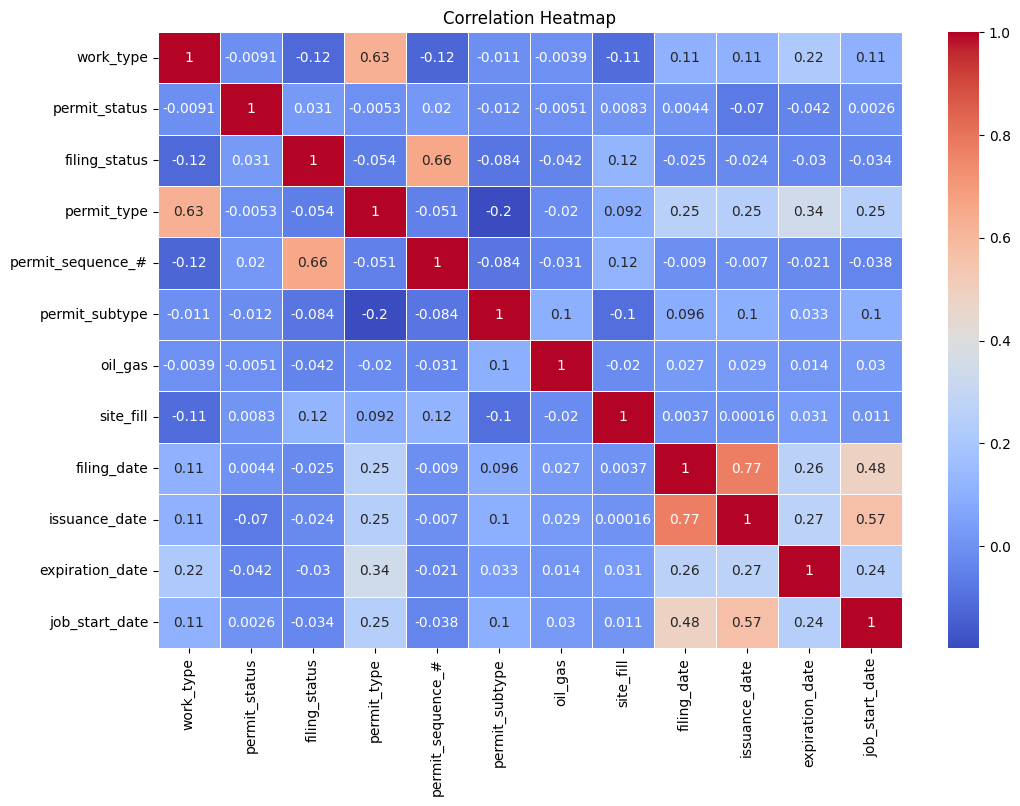

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

col_names = [
    'work_type',
    'permit_status',
    'filing_status',
    'permit_type',
    'permit_sequence_#',
    'permit_subtype',
    'oil_gas',
    'site_fill',
    'filing_date',
    'issuance_date',
    'expiration_date',
    'job_start_date'
]

selected_columns = df[col_names]

# Convert string values to numerical labels and calculate Pearson correlation
correlation_matrix = selected_columns.apply(lambda x: pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

# Create a correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [62]:
df['permit_status'].value_counts()

permit_status
ISSUED        3872138
RE-ISSUED       48683
IN PROCESS      20370
REVOKED             5
Name: count, dtype: int64

In [ ]:
df['']